## Sprint 2: Model Building

## Importing the required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt   # For Data Visualization
import tensorflow   # An open-source library used for Machine Learning and Deep Learning Computations
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.models import Sequential
from keras.utils import np_utils
from keras.optimizers import Adam

## Importing MNIST Dataset

In [2]:
from tensorflow.keras.datasets import mnist

## Data Preprocessing

In [3]:
# Load and Split data for training and testing
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshaping the data
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

# one-hot encoding
no_of_classes = 10
y_train = np_utils.to_categorical(y_train, no_of_classes)
y_test = np_utils.to_categorical(y_test, no_of_classes)

11490434/11490434 [==============================] - 1s 0us/step


## Add CNN Layers

In [4]:
# Create model
model = Sequential()

In [5]:
# Adding Model Layer
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))

In [6]:
# Flatten image dimensions
model.add(Flatten())

In [7]:
# Add output layer
model.add(Dense(no_of_classes, activation='softmax'))

## Compiling the Model

In [8]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [9]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

## Training the Model

In [10]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 195s 103ms/step - loss: 0.2417 - accuracy: 0.9507 - val_loss: 0.0860 - val_accuracy: 0.9740
Epoch 2/5
1875/1875 [==============================] - 191s 102ms/step - loss: 0.0694 - accuracy: 0.9790 - val_loss: 0.1049 - val_accuracy: 0.9697
Epoch 3/5
1875/1875 [==============================] - 193s 103ms/step - loss: 0.0503 - accuracy: 0.9839 - val_loss: 0.0902 - val_accuracy: 0.9766
Epoch 4/5
1875/1875 [==============================] - 192s 102ms/step - loss: 0.0402 - accuracy: 0.9873 - val_loss: 0.0904 - val_accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 195s 104ms/step - loss: 0.0321 - accuracy: 0.9899 - val_loss: 0.1086 - val_accuracy: 0.9755


## Metrics after Training

In [11]:
metrics = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: ', metrics[1])
print('Test Loss: ', metrics[0])

Test Accuracy:  0.9754999876022339
Test Loss:  0.10858014971017838


## Model Testing


In [18]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 22ms/step
[[2.07057356e-14 8.30734594e-18 3.57438731e-12 9.87902316e-10
  9.58776582e-20 3.72018018e-19 1.08355242e-17 1.00000000e+00
  1.24084814e-12 2.74670586e-12]
 [2.69013967e-08 9.79363923e-10 9.99999881e-01 1.57537627e-08
  1.19957999e-13 2.94362625e-13 1.08572380e-07 3.48724142e-15
  1.02734724e-10 7.42541692e-16]
 [4.79320725e-08 9.98513639e-01 1.23325890e-05 4.92669772e-09
  2.17431971e-05 2.88649653e-06 6.14164151e-08 1.79028731e-07
  1.44907669e-03 7.20998053e-11]
 [9.99997258e-01 2.02756844e-16 5.03159159e-09 2.53589966e-12
  9.11328513e-11 1.71382963e-10 3.88559185e-09 2.34050314e-11
  3.65713748e-09 2.77833919e-06]]


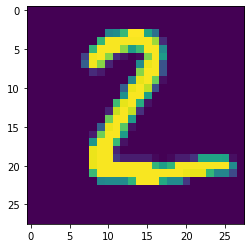

In [19]:
plt.imshow(tensorflow.squeeze(X_test[1]))

In [20]:
print(np.argmax(prediction, axis=1))

[7 2 1 0]


In [21]:
# np.argmax(y_test[5100:5101])
print(y_test[:4])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [22]:
print(np.argmax(y_test[1]))

2


In [23]:
prediction2 = model.predict(X_test[6000:6001])
print(prediction2)

1/1 [==============================] - 0s 20ms/step
[[9.9830235e-13 6.3287729e-16 4.7819198e-13 3.2623852e-06 2.4456109e-05
  4.5697340e-07 3.1150005e-15 1.3018149e-02 2.5506595e-05 9.8692816e-01]]


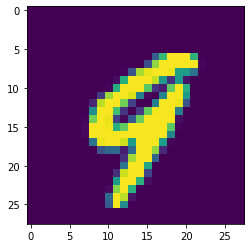

In [24]:
plt.imshow(tensorflow.squeeze(X_test[5100]))

In [25]:
print(np.argmax(prediction2, axis=1))

[9]


In [26]:
np.argmax(y_test[5100:5101])

9

## Metrics after Testing

In [27]:
metrics = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: ', metrics[1])
print('Test Loss: ', metrics[0])

Test Accuracy:  0.9754999876022339
Test Loss:  0.10858014971017838


## Save the model

In [28]:
model.save('models/mnist_digit_recog_cnn.h5')